# Machine Learning (COSC 522)
## Project 4

## Mount Google Drive Folder (For Google Collab)

In [1]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

In [2]:
# Clone the repository if you're in Google Collab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=False)
def mount_and_change_dir(is_collab: bool = False):
    from google.colab import drive
    # Mount Google Drive
    drive.mount('/content/drive', force_remount=False)
    # Set working directory
    project_path = '/content/drive/MyDrive/Projects/UTK/COSC522'
    os.chdir(project_path)
    print(os.listdir(project_path))
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(mount_and_change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

## Initializations

In [3]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_formats = ['png']

import numpy as np
import matplotlib.pyplot as plt
from time import time
from pprint import pprint
import seaborn as sns
from scipy.stats import uniform, gaussian_kde, norm
from typing import *
from tqdm.notebook import tqdm

from custom_libs import ColorizedLogger

sns.set_style('darkgrid')

logger = ColorizedLogger('Project3', 'yellow')

### Load the two datasets and Preprocessing

In [4]:
# Located in <project root>/custom_libs/Project3
import custom_libs.Project4.data_loader as dl

In [5]:
# Create a Data Loader
datasets = ['xor', 'mnist']
data_loader = dl.DataLoader(datasets=datasets, data_folder='data')

In [6]:
# Print Statistics
data_loader.print_statistics()

2021-10-26 23:55:18 Data Loader  INFO     -- xor --
2021-10-26 23:55:18 Data Loader  INFO     	Shape: (4, 3)
2021-10-26 23:55:18 Data Loader  INFO     	Type: int64
2021-10-26 23:55:18 Data Loader  INFO     	Mean:
2021-10-26 23:55:18 Data Loader  INFO     		[0.5 0.5 0.5] (..)
2021-10-26 23:55:18 Data Loader  INFO     	Max:
2021-10-26 23:55:18 Data Loader  INFO     		[1 1 1] (..)
2021-10-26 23:55:18 Data Loader  INFO     	Min:
2021-10-26 23:55:18 Data Loader  INFO     		[0 0 0] (..)
2021-10-26 23:55:18 Data Loader  INFO     	Head:
2021-10-26 23:55:18 Data Loader  INFO     		[0 0 0] (..)
2021-10-26 23:55:18 Data Loader  INFO     -- mnist_tr_x --
2021-10-26 23:55:18 Data Loader  INFO     	Shape: (60000, 784)
2021-10-26 23:55:18 Data Loader  INFO     	Type: uint8
2021-10-26 23:55:18 Data Loader  INFO     	Mean:
2021-10-26 23:55:18 Data Loader  INFO     		[0. 0. 0. 0.] (..)
2021-10-26 23:55:18 Data Loader  INFO     	Max:
2021-10-26 23:55:18 Data Loader  INFO     		[0 0 0 0] (..)
2021-10-26 2

In [7]:
# Get the two datasets
datasets = data_loader.get_datasets()
xor_data = datasets['xor']
mnist_tr_x, mnist_tr_y, mnist_te_x, mnist_te_y = datasets['mnist']
print(xor_data)

[[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]]


## Task 1

In [8]:
# Located in <project root>/custom_libs/Project4
import custom_libs.Project4.models as p4_models

In [205]:
n_units = [xor_data.shape[1]-1, 4, 3, xor_data[:, -1].max()+]
activations = ["sigmoid", "sigmoid", "sigmoid"]
lr = 0.1
batch_size = 1
max_epochs = 2000
shuffle = False
seed = None#3
# debug = {'top': 3, 'ff': 3, 'bp': 3, 'w': 3}
debug = {'top': 2, 'ff': 0, 'bp': 0, 'w': 0}
mlp = p4_models.MultiLayerPerceptron(units=n_units, activations=activations, seed=seed)
accuracies, losses = mlp.train(train=xor_data.copy(), shuffle=shuffle, batch_size=batch_size, lr=lr, 
          max_epochs=max_epochs, debug=debug)


2021-10-28 18:42:02 Project4 Models INFO     Shapes of biases: [(4, 1), (3, 1), (2, 1)]
2021-10-28 18:42:02 Project4 Models INFO     Shapes of weights: [(4, 2), (3, 4), (2, 3)]
2021-10-28 18:42:02 Project4 Models INFO     Epoch: 10
2021-10-28 18:42:02 Project4 Models INFO       Loss: 0.27825
2021-10-28 18:42:02 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:02 Project4 Models INFO     Epoch: 20
2021-10-28 18:42:02 Project4 Models INFO       Loss: 0.30317
2021-10-28 18:42:02 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:02 Project4 Models INFO     Epoch: 30
2021-10-28 18:42:02 Project4 Models INFO       Loss: 0.31943
2021-10-28 18:42:02 Project4 Models INFO       Accuracy on training data: 3 / 4
2021-10-28 18:42:02 Project4 Models INFO     Epoch: 40
2021-10-28 18:42:02 Project4 Models INFO       Loss: 0.32982
2021-10-28 18:42:02 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:02 Project4 Models INF

2021-10-28 18:42:03 Project4 Models INFO     Epoch: 350
2021-10-28 18:42:03 Project4 Models INFO       Loss: 0.34725
2021-10-28 18:42:03 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:03 Project4 Models INFO     Epoch: 360
2021-10-28 18:42:03 Project4 Models INFO       Loss: 0.34725
2021-10-28 18:42:03 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:03 Project4 Models INFO     Epoch: 370
2021-10-28 18:42:03 Project4 Models INFO       Loss: 0.34725
2021-10-28 18:42:03 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:03 Project4 Models INFO     Epoch: 380
2021-10-28 18:42:03 Project4 Models INFO       Loss: 0.34724
2021-10-28 18:42:03 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:03 Project4 Models INFO     Epoch: 390
2021-10-28 18:42:03 Project4 Models INFO       Loss: 0.34724
2021-10-28 18:42:03 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:4

2021-10-28 18:42:03 Project4 Models INFO     Epoch: 700
2021-10-28 18:42:03 Project4 Models INFO       Loss: 0.34717
2021-10-28 18:42:03 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:03 Project4 Models INFO     Epoch: 710
2021-10-28 18:42:03 Project4 Models INFO       Loss: 0.34716
2021-10-28 18:42:03 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:03 Project4 Models INFO     Epoch: 720
2021-10-28 18:42:03 Project4 Models INFO       Loss: 0.34716
2021-10-28 18:42:03 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:04 Project4 Models INFO     Epoch: 730
2021-10-28 18:42:04 Project4 Models INFO       Loss: 0.34716
2021-10-28 18:42:04 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:04 Project4 Models INFO     Epoch: 740
2021-10-28 18:42:04 Project4 Models INFO       Loss: 0.34715
2021-10-28 18:42:04 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:4

2021-10-28 18:42:04 Project4 Models INFO     Epoch: 1050
2021-10-28 18:42:04 Project4 Models INFO       Loss: 0.34700
2021-10-28 18:42:04 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:04 Project4 Models INFO     Epoch: 1060
2021-10-28 18:42:04 Project4 Models INFO       Loss: 0.34699
2021-10-28 18:42:04 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:04 Project4 Models INFO     Epoch: 1070
2021-10-28 18:42:04 Project4 Models INFO       Loss: 0.34698
2021-10-28 18:42:04 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:04 Project4 Models INFO     Epoch: 1080
2021-10-28 18:42:04 Project4 Models INFO       Loss: 0.34697
2021-10-28 18:42:04 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28 18:42:04 Project4 Models INFO     Epoch: 1090
2021-10-28 18:42:04 Project4 Models INFO       Loss: 0.34697
2021-10-28 18:42:04 Project4 Models INFO       Accuracy on training data: 2 / 4
2021-10-28

2021-10-28 18:42:05 Project4 Models INFO       Accuracy on training data: 1 / 4
2021-10-28 18:42:05 Project4 Models INFO     Epoch: 1400
2021-10-28 18:42:05 Project4 Models INFO       Loss: 0.34643
2021-10-28 18:42:05 Project4 Models INFO       Accuracy on training data: 1 / 4
2021-10-28 18:42:05 Project4 Models INFO     Epoch: 1410
2021-10-28 18:42:05 Project4 Models INFO       Loss: 0.34640
2021-10-28 18:42:05 Project4 Models INFO       Accuracy on training data: 1 / 4
2021-10-28 18:42:05 Project4 Models INFO     Epoch: 1420
2021-10-28 18:42:05 Project4 Models INFO       Loss: 0.34636
2021-10-28 18:42:05 Project4 Models INFO       Accuracy on training data: 1 / 4
2021-10-28 18:42:05 Project4 Models INFO     Epoch: 1430
2021-10-28 18:42:05 Project4 Models INFO       Loss: 0.34633
2021-10-28 18:42:05 Project4 Models INFO       Accuracy on training data: 1 / 4
2021-10-28 18:42:05 Project4 Models INFO     Epoch: 1440
2021-10-28 18:42:05 Project4 Models INFO       Loss: 0.34629
2021-10-28

2021-10-28 18:42:06 Project4 Models INFO       Loss: 0.34388
2021-10-28 18:42:06 Project4 Models INFO       Accuracy on training data: 1 / 4
2021-10-28 18:42:06 Project4 Models INFO     Epoch: 1750
2021-10-28 18:42:06 Project4 Models INFO       Loss: 0.34373
2021-10-28 18:42:06 Project4 Models INFO       Accuracy on training data: 1 / 4
2021-10-28 18:42:06 Project4 Models INFO     Epoch: 1760
2021-10-28 18:42:06 Project4 Models INFO       Loss: 0.34357
2021-10-28 18:42:06 Project4 Models INFO       Accuracy on training data: 1 / 4
2021-10-28 18:42:06 Project4 Models INFO     Epoch: 1770
2021-10-28 18:42:06 Project4 Models INFO       Loss: 0.34340
2021-10-28 18:42:06 Project4 Models INFO       Accuracy on training data: 1 / 4
2021-10-28 18:42:06 Project4 Models INFO     Epoch: 1780
2021-10-28 18:42:06 Project4 Models INFO       Loss: 0.34322
2021-10-28 18:42:06 Project4 Models INFO       Accuracy on training data: 1 / 4
2021-10-28 18:42:06 Project4 Models INFO     Epoch: 1790
2021-10-28

In [ ]:
def plot_results(losses, accuracies):
    subsample = 100
    losses_ = losses[::subsample]
    accuracies_ = accuracies[::subsample]
    x = np.arange(1, len(losses_)+1)

    plt.plot(x, losses_)
    plt.plot(x, accuracies_)


In [ ]:
plot_results(losses, accuracies)

## Task 2

In [204]:
print(mnist_tr_x.shape)
print(mnist_tr_y.shape)
mnist_tr = np.concatenate([mnist_tr_x, mnist_tr_y], axis=1)
print(mnist_tr.shape)
print(mnist_tr[:, -1].max())

(60000, 784)
(60000, 1)
(60000, 785)
9


In [209]:
# mnist_tr_x, mnist_tr_y, mnist_te_x, mnist_te_y

n_units = [mnist_tr.shape[1]-1, 4, mnist_tr[:, -1].max()+1]
activations = ["sigmoid", "sigmoid"]
lr = 0.01
batch_size = 15
max_epochs = 5
shuffle = True
seed = 3
# debug = {'top': 3, 'ff': 3, 'bp': 3, 'w': 3}
debug = {'top': 2, 'ff': 0, 'bp': 0, 'w': 0}
mlp = p4_models.MultiLayerPerceptron(units=n_units, activations=activations, seed=seed)
accuracies, losses = mlp.train(train=mnist_tr.copy(), shuffle=shuffle, batch_size=batch_size, lr=lr, 
          max_epochs=max_epochs, debug=debug)

2021-10-28 18:46:18 Project4 Models INFO     Shapes of biases: [(4, 1), (10, 1)]
2021-10-28 18:46:18 Project4 Models INFO     Shapes of weights: [(4, 784), (10, 4)]
2021-10-28 18:46:18 Project4 Models INFO     Epoch: 1
/home/drkostas/GDrive/Projects/UTK/COSC522/custom_libs/Project4/models.py:192: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
2021-10-28 18:46:26 Project4 Models INFO       Loss: 0.01231
2021-10-28 18:46:26 Project4 Models INFO       Accuracy on training data: 5938 / 60000
2021-10-28 18:46:26 Project4 Models INFO     Epoch: 2
2021-10-28 18:46:34 Project4 Models INFO       Loss: 0.00605
2021-10-28 18:46:34 Project4 Models INFO       Accuracy on training data: 5966 / 60000
2021-10-28 18:46:34 Project4 Models INFO     Epoch: 3
2021-10-28 18:46:42 Project4 Models INFO       Loss: 0.00398
2021-10-28 18:46:42 Project4 Models INFO       Accuracy on training data: 5972 / 60000
2021-10-28 18:46:42 Project4 Models INFO     Epoch: 4
2021-10-28 18:46:5

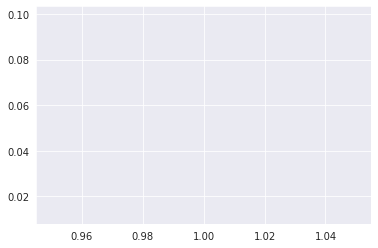

In [210]:
plot_results(losses, accuracies)

## Task 3